# 课堂实验 - 基本的图像操作和处理
你可以利用 PIL (Python Imaging Library, 图像处理类库)进行图像操作，比如图像缩放、裁剪、旋转、颜色转换等。如果你的 Python 版本没有自带 PIL，你可以从 http://pythonware.com/products/pil/ 下载。

Matplotlib 是一个绘图库，具有比 PIL 更强大的绘图功能，Matplotlib 中的 PyLab 接口包含很多方便用户创建图像的函数。 如果你的 Python 版本没有自带 Matplotlib，可以从 http://matplotlib.sourceforge.net/ 下载，__该链接中也包括了非常详尽的使用说明和教程__。
## 实验1
利用 PIL 中的 Python 模块读取一张图片，然后讲其转换成灰度图像，并使其显示。

**提示**: 关于 Image 模块的使用，可以参考 http://effbot.org/imagingbook/image.htm

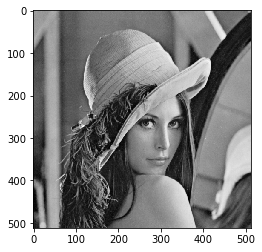

In [71]:
# 引入实验需要的库
from PIL import Image
from pylab import imshow

# 设置以内联的形式显示 matplotlib 绘制的图片（在 Notebook 中显示更美观）
%matplotlib inline

# 使用 Image.open(path) 读取你电脑中的一张图片
path = 'IMAGE/Lena.tiff'  # 需要打开的图片的路径
pil_im = Image.open(path)

# 使用 convert('L') 方法将其转换为灰度图像，
# 事实上 convert() 方法有更多的用途，你可以在上面提示信息的链接中获取更多信息。
pil_im_l = pil_im.convert('L')

# 显示经过处理后的图片
imshow(pil_im_l)

## 实验 2 - 对图像的简单处理
使用 PIL 中的 thumbnail() 方法可以很方便的创建图像的缩略图，它接受一个指定生成缩略图大小的二元元组。

你需要创建一个缩略图，并使其显示; 然后使用 crop() 方法从一副图像中裁剪指定区域，再将裁减的区域使用 transpose() 方法选择 180 度，最后用 paste() 方法将旋转后的区域放回原图并使其显示。

__提示__：

- 关于这些方法的使用，你同样可以在 http://effbot.org/imagingbook/image.htm 找到
- 旋转 180 度时，可能要用到 Image.ROTATE_180 这一预定义常量
- 你也可以使用 resize, rotate 方法完成这个实验

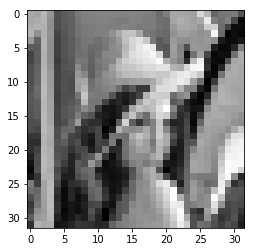

In [72]:
pil_im.thumbnail((32, 32))
imshow(pil_im)

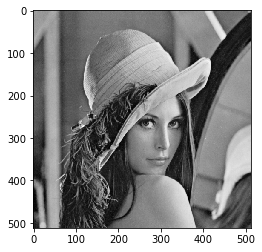

In [73]:
# thubmnail(), paste() 等方法会直接修改对象本身，在进行下面的操作之前，需要重新获取图片
pil_im = Image.open('IMAGE/Lena.tiff')

# TODO
box = (1, 1, 2, 2) # box 为一个代表（左，上，右，下）的四元组
region = pil_im.crop(box) # 进行裁剪

## 你的代码
## ...
##

imshow(pil_im)

## 实验 3 - 图像轮廓和直方图
图像用 NumPy 数组表示后，我们可以对它们执行任意数学操作。如果你的电脑里没有 NumPy，可以在 http://www.scipy.org/Download 下载。这里是一个简单的 NumPy 入门教程：https://zhuanlan.zhihu.com/p/20878530

因为绘制轮廓需要对每个坐标[x, y]的像素值施加同一个阈值，所以首先要将图像灰度化：

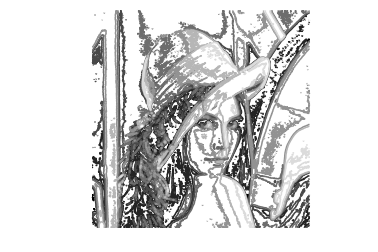

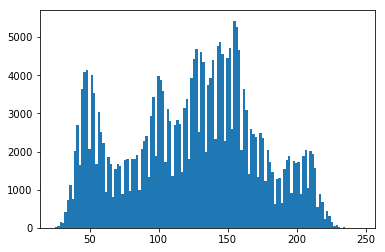

In [74]:
from pylab import figure, gray, contour, axis, hist, show
from numpy import array

im = array(pil_im_l) #使用实验 1 的结果

# 新建一个图像
figure()
# 不使用颜色信息
gray()
# 在原点的左上角显示轮廓图像
contour(im, origin='image')
axis('equal')
axis('off')

figure()
hist(im.flatten(), 128)
show()

## 实验 4 - 灰度变换

在这个实验中，你需要先将图像读入 NumPy 数组（可参考实验 3），然后构造不少于一个映射，将 0...255 区间（或者 0...1 区间）映射到自身（即输出区间范围和输入区间范围相同）。

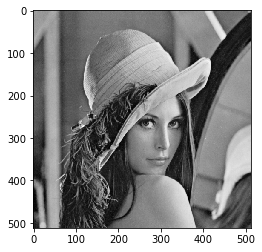

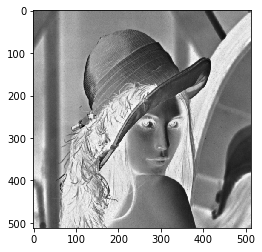

In [20]:
## TO DO
im = array(pil_im)
# 灰度变换举例
figure()
imshow(im)

# 例子：颜色反转
im2 = 255 - im 
# 尝试其他变换

figure()
imshow(im2)

## 实验 5 - 直方图均衡化
图像灰度变换中一个很有用的例子就是直方图均衡化。直方图均衡化是指将一幅图像的灰度直方图变平，使变换后的图像中每个灰度值的分布概率都相同。在对图像进行进一步处理之前，直方图均衡化通常是对图像灰度值进行归一化的一个非常好的方法，并且可以增强图像的对比度。

在这种情况下，直方图均衡化的变化函数是图像中像素值的累积分布函数（cumulative distribution function，简称 cdf，将像素值的范围映射到目标范围的归一化操作）

你需要实现直方图均衡化的代码，并使用 imshow() 方法展示一张经过直方图均衡化的图片。
__提示：__

- 使用 histogram() 函数获取直方图数据 doc: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.histogram.html
- 使用 cumsum() 方法科技计算累积和 doc: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.cumsum.html
- 线性插值函数 interp() doc: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.interp.html


In [ ]:
from numpy import histogram, interp
def histeq(im, nbr_bins=256):
    """对一幅灰度图像进行直方图均衡化"""
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            D[im[i][j]] += 1
    D2 = cumsum(D)
    ## ...
    
    return None

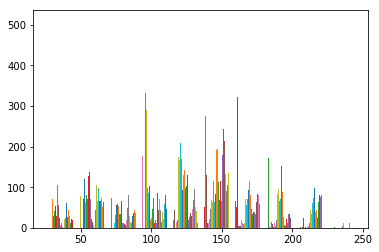

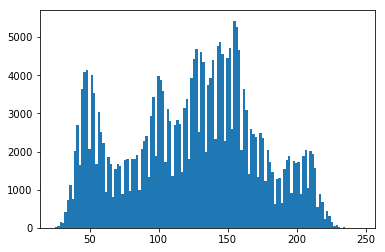

In [26]:
H = hist(im)
figure()
hist(im.flatten(), 128)
show()

In [82]:
import numpy as np
from pylab import subplot

P = np.zeros(256)
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        P[im[i][j]] += 1

P = P/256
C = np.cumsum(P)

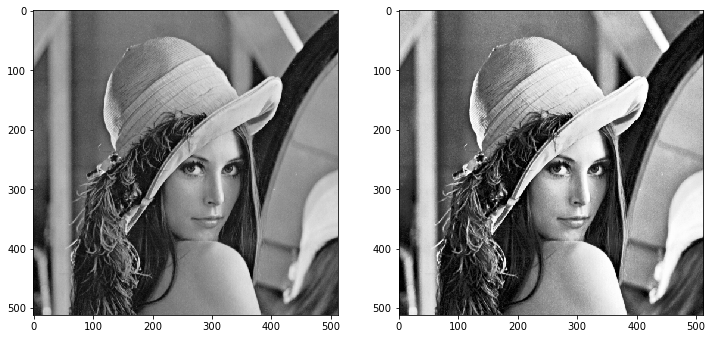

In [86]:
P = np.zeros((256), dtype=np.float)
w = im.shape[0]
h = im.shape[1]
for i in range(w):
    for j in range(h):
        P[im[i][j]] += 1
        
P = P/sum(P)
C = np.cumsum(P)

M = np.zeros((w,h), dtype=np.uint8)
for i in range(w):
    for j in range(h):
        M[i][j] = C[im[i][j]] * 255

M
figure(figsize=(12,6))
subplot(121)
imshow(im)

subplot(122)
imshow(M)